# Dataset Hepatitis

- Memuat modul

Perlu memuat modul untuk menggunakan perintah import


In [91]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.activations import relu, sigmoid
import matplotlib.pyplot as plt
from keras.optimizers import Adam

- Memuat data

Karena dataset diunduh sebagai file csv, maka menggunakan perintah Pandas read_csv yang secara otomatis membaca file tersebut menjadi DataFrame.
Dataset yang digunakan dalam hal ini adalah hepatitis by UCI Machine Learning.

In [92]:
header = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology']
dataset = pd.read_csv("hepatitis.csv")

In [93]:
dataset.head()    #Untuk melihat data sebanyak n pada kolom awal

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [94]:
print(dataset.describe())   #Untuk melihat Statistik Deskriptif

            Class         Age         Sex     Steroid  Antivirals     Fatigue  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     1.816901   40.816901    1.105634    1.514085    1.838028    1.359155   
std      0.388116   12.189182    0.308456    0.501571    0.369729    0.481451   
min      1.000000    7.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000   32.000000    1.000000    1.000000    2.000000    1.000000   
50%      2.000000   39.000000    1.000000    2.000000    2.000000    1.000000   
75%      2.000000   50.000000    1.000000    2.000000    2.000000    2.000000   
max      2.000000   78.000000    2.000000    2.000000    2.000000    2.000000   

          Malaise    Anorexia   Liver Big  Liver Firm  Spleen Palable  \
count  142.000000  142.000000  142.000000  142.000000      142.000000   
mean     1.619718    1.795775    1.823944    1.584507        1.809859   
std      0.487174    0.404561    0.382216    0.4945

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
Class             142 non-null int64
Age               142 non-null int64
Sex               142 non-null int64
Steroid           142 non-null int64
Antivirals        142 non-null int64
Fatigue           142 non-null int64
Malaise           142 non-null int64
Anorexia          142 non-null int64
Liver Big         142 non-null int64
Liver Firm        142 non-null int64
Spleen Palable    142 non-null int64
Spiders           142 non-null int64
Ascites           142 non-null int64
Varices           142 non-null int64
Bilirubin         142 non-null float64
Alk Phosphate     142 non-null int64
Sgot              142 non-null int64
Albumin           142 non-null float64
Protime           142 non-null int64
Histology         142 non-null int64
dtypes: float64(2), int64(18)
memory usage: 22.3 KB


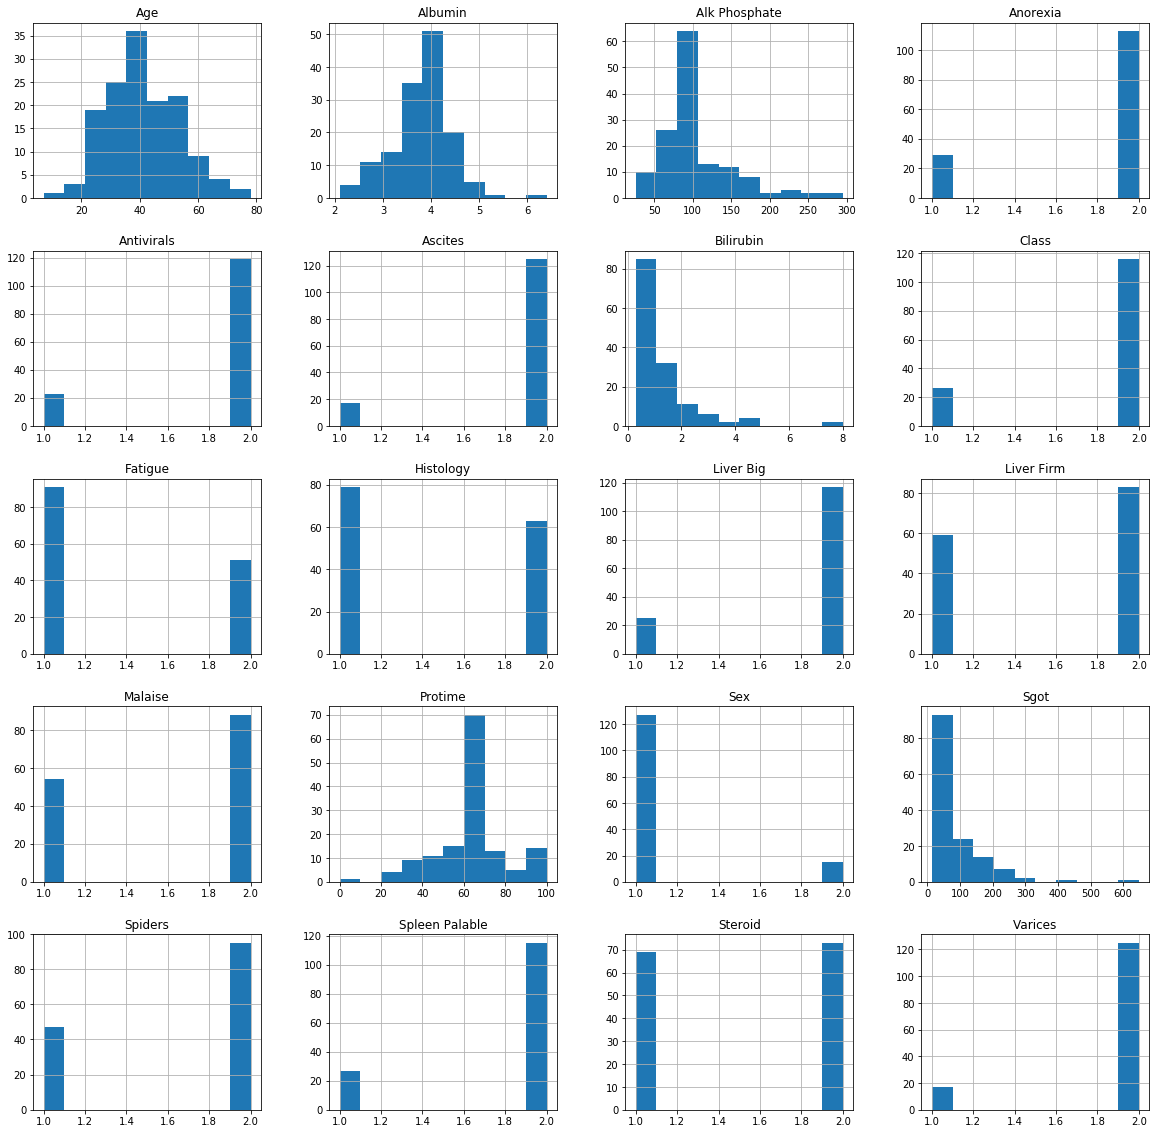

In [96]:
dataset.hist(figsize=(20,20)) #Untuk menampilkan dan menunjukkan distribusi frekuensi berdasarkan data
plt.show() #Untuk menampilkan dalam bentuk grafik

- Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. 

Class                AxesSubplot(0.125,0.848277;0.352273x0.0317227)
Age               AxesSubplot(0.547727,0.848277;0.352273x0.0317227)
Sex                   AxesSubplot(0.125,0.81021;0.352273x0.0317227)
Steroid            AxesSubplot(0.547727,0.81021;0.352273x0.0317227)
Antivirals           AxesSubplot(0.125,0.772143;0.352273x0.0317227)
Fatigue           AxesSubplot(0.547727,0.772143;0.352273x0.0317227)
Malaise              AxesSubplot(0.125,0.734076;0.352273x0.0317227)
Anorexia          AxesSubplot(0.547727,0.734076;0.352273x0.0317227)
Liver Big            AxesSubplot(0.125,0.696008;0.352273x0.0317227)
Liver Firm        AxesSubplot(0.547727,0.696008;0.352273x0.0317227)
Spleen Palable       AxesSubplot(0.125,0.657941;0.352273x0.0317227)
Spiders           AxesSubplot(0.547727,0.657941;0.352273x0.0317227)
Ascites              AxesSubplot(0.125,0.619874;0.352273x0.0317227)
Varices           AxesSubplot(0.547727,0.619874;0.352273x0.0317227)
Bilirubin            AxesSubplot(0.125,0.581807;

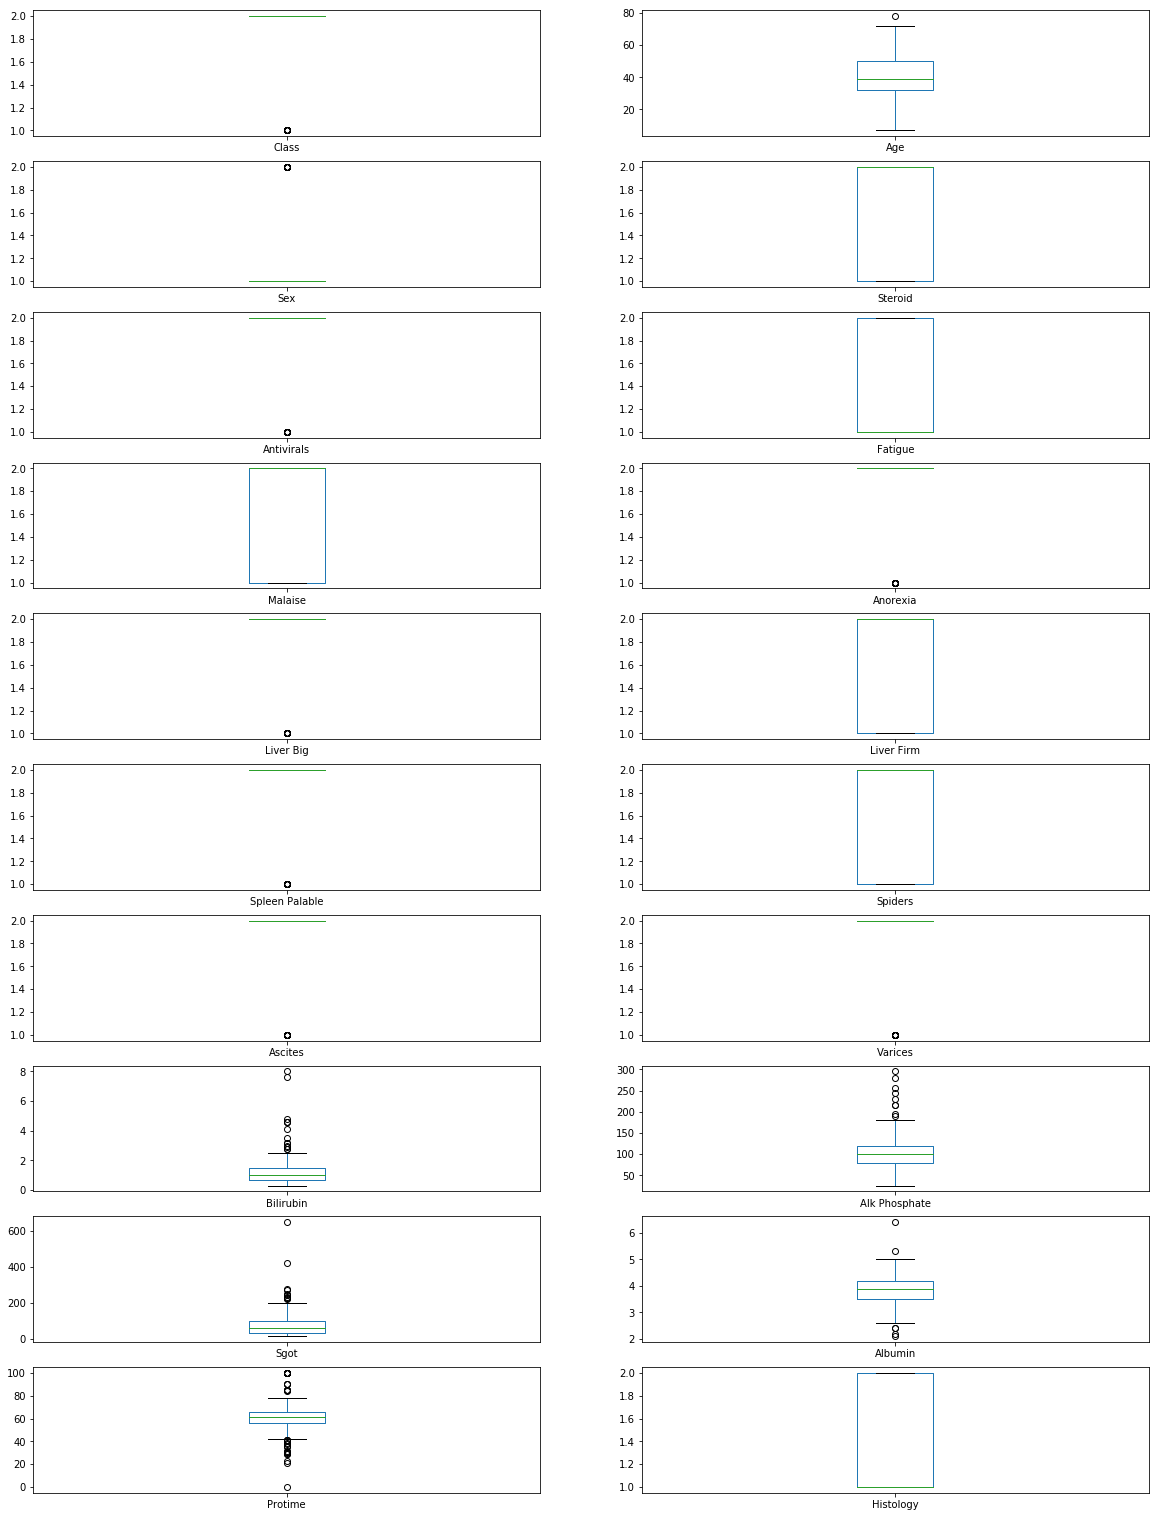

In [97]:
dataset.plot(kind='box', subplots=True, layout=(20,2), sharex=False, sharey=False, figsize=(20,55))

In [98]:
X = dataset.iloc[:,0:19].values #nilai variabel x diambil dari kolom 0-19 (input)
y = dataset.iloc[:,19].values #nilai variabel y diambil dari kolom 19 (ouput)

In [99]:
data = pd.DataFrame(dataset)   #Untuk memeriksa bentuk DataFrame agar sesuai dengan spesifikasi yang disediakan pada dataset 
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.00,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.50,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.00,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,1
5,1,51,1,1,2,1,2,1,2,2,1,1,2,2,1.42,105,85,3.81,61,1
6,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,85,3.81,61,1
7,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,105,48,4.40,61,1
8,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,120,3.90,61,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.40,85,1


In [100]:
#melakukan scaling dataset
from keras.utils.np_utils import to_categorical
scaler = MinMaxScaler() #mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan

X_scaled = scaler.fit_transform(X) #merubah atau melakukan scaling pada nilai variabel x
X_scaled.shape

(142, 19)

In [101]:
#mengkonversi class bilangan bulat menjadi bilangan biner
y_categorical = to_categorical(y)
y_categorical.shape

(142, 3)

- Training and Test datasets

Untuk training dan testing model,perlu membagi dataset menjadi subdataset, pelatihan, dan dataset pengujian. Model akan belajar dari dataset pelatihan untuk digeneralisasikan ke data lain; dataset uji akan digunakan untuk "menguji" apa yang dipelajari model dalam pelatihan dan langkah pemasangan. Adalah umum untuk menggunakan aturan 70% -30% untuk membagi dataset asli. Penting untuk menggunakan metode yang andal untuk membagi dataset untuk menghindari kebocoran data; ini adalah kehadiran di set uji contoh yang juga di set pelatihan. Pertama, menetapkan semua kolom kecuali variabel dependen ("Kelas") ke variabel X dan kolom "Kelas" ke variabel y. Dan kemudian akan melatih_test_split dari pustaka scikit-learning untuk membaginya menjadi X_train, X_test , y_train dan y_test. Penting untuk menambahkan random_state karena ini akan memungkinkan untuk mendapatkan hasil yang sama setiap kali kita menjalankan kode.


In [102]:
#membagi dataset dengan training 80% dari data dan testing 20% dari data, sisa nya akan digunakan untuk validasi,dan setiap data pilih secara acak
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, 
                                                   train_size=0.7,
                                                   test_size=0.3, 
                                                   random_state=8)

In [103]:
#mencetak ukuran data training dan testing, dimana X_train dan X_test untuk masukan, sedangkan y_train dan y_test untuk keluaran
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (99, 19) (99, 3)
Testing data shape :  (43, 19) (43, 3)


In [104]:
# mencetak kelas keluaran yang dihasilkan 
target = np.unique(y_train)
ntarget = len(target)
print('Total number of outputs : ', target)
print('Output target : ', ntarget)

Total number of outputs :  [0. 1.]
Output target :  2


In [105]:
model = Sequential()
model.add(Dense(20, input_dim=19, activation='relu'))
model.add(Dense(20, activation='relu', use_bias= 0.4))
model.add(Dense(3, activation='sigmoid'))

Dalam hal ini, terdapat input layer, hidden layer, dan output layer. Dimana ada yang menggunakan Rectified Linear Unit atau yang dikenal sebagai ReLU, adalah cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf. Fungsi ini hanya max (0, x), dan Sigmoid yang merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum.

In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek AST). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

Untuk training menggunakan model.fit dimana X_train adalah numpy array yang digunakan sebagai data training untuk inputan, y_test adalah numpy array yang digunakan untuk data target atau keluaran, batch_size jumlah sampel per pembaharuan gradien jika tidak kita set maka nilai nya akan menggunakan nilai default yaitu 32, epochs jumlah epochs untuk melatih model, epochs adalah iterasi atas seluruh data x dan y yang disediakan, 1 kali epochs sama dengan satu kali perhitungan maju mundur, validation_data(15%) untuk mengevaluasi kerugian dan metrik model apa pun pada setiap akhir epochs

In [107]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Train on 99 samples, validate on 43 samples
Epoch 1/100
99/99 [==============================] - 3s 26ms/step - loss: 0.7333 - acc: 0.3973 - val_loss: 0.7270 - val_acc: 0.4186
Epoch 2/100
99/99 [==============================] - 0s 152us/step - loss: 0.7161 - acc: 0.4242 - val_loss: 0.7102 - val_acc: 0.4419
Epoch 3/100
99/99 [==============================] - 0s 131us/step - loss: 0.7008 - acc: 0.4680 - val_loss: 0.6943 - val_acc: 0.5194
Epoch 4/100
99/99 [==============================] - 0s 162us/step - loss: 0.6860 - acc: 0.5286 - val_loss: 0.6796 - val_acc: 0.5891
Epoch 5/100
99/99 [==============================] - 0s 121us/step - loss: 0.6732 - acc: 0.5690 - val_loss: 0.6661 - val_acc: 0.6124
Epoch 6/100
99/99 [==============================] - 0s 131us/step - loss: 0.6605 - acc: 0.5926 - val_loss: 0.6536 - val_acc: 0.6279
Epoch 7/100
99/99 [==============================] - 0s 141us/step - loss: 0.6489 - acc: 0.6162 - val_loss: 0.6421 - val_acc: 0.6357
Epoch 8/100
99/99 [=======

Epoch 62/100
99/99 [==============================] - 0s 152us/step - loss: 0.4161 - acc: 0.7912 - val_loss: 0.4219 - val_acc: 0.7907
Epoch 63/100
99/99 [==============================] - 0s 141us/step - loss: 0.4148 - acc: 0.7946 - val_loss: 0.4207 - val_acc: 0.7907
Epoch 64/100
99/99 [==============================] - 0s 131us/step - loss: 0.4132 - acc: 0.7912 - val_loss: 0.4196 - val_acc: 0.7907
Epoch 65/100
99/99 [==============================] - 0s 131us/step - loss: 0.4117 - acc: 0.7946 - val_loss: 0.4184 - val_acc: 0.7907
Epoch 66/100
99/99 [==============================] - 0s 131us/step - loss: 0.4103 - acc: 0.7946 - val_loss: 0.4173 - val_acc: 0.7907
Epoch 67/100
99/99 [==============================] - 0s 111us/step - loss: 0.4089 - acc: 0.7980 - val_loss: 0.4164 - val_acc: 0.7984
Epoch 68/100
99/99 [==============================] - 0s 111us/step - loss: 0.4074 - acc: 0.8013 - val_loss: 0.4154 - val_acc: 0.7984
Epoch 69/100
99/99 [==============================] - 0s 121us

In [108]:
#mencetak predict dari input yang akan diperoleh
predict = model.predict(X_scaled)
predict

array([[0.00498801, 0.75667477, 0.24882407],
       [0.01030604, 0.69793844, 0.30217722],
       [0.00207611, 0.6740776 , 0.321439  ],
       [0.00170811, 0.70695955, 0.30077145],
       [0.00187854, 0.72000873, 0.28853807],
       [0.01597351, 0.32708338, 0.69068396],
       [0.00183151, 0.71977615, 0.2835452 ],
       [0.00296027, 0.6835291 , 0.30407014],
       [0.00177852, 0.7156213 , 0.2901554 ],
       [0.01058863, 0.76832277, 0.25721982],
       [0.00594603, 0.6357183 , 0.38788983],
       [0.00413095, 0.7807471 , 0.2079409 ],
       [0.00264763, 0.6614818 , 0.31700975],
       [0.00312414, 0.76343566, 0.2460432 ],
       [0.00748012, 0.5506532 , 0.39187965],
       [0.00205698, 0.67825586, 0.31168684],
       [0.00435889, 0.65276223, 0.34490463],
       [0.00185282, 0.7209338 , 0.29001552],
       [0.01094335, 0.77752215, 0.24610762],
       [0.00190629, 0.8329676 , 0.15702586],
       [0.03416613, 0.46313098, 0.5072448 ],
       [0.00188239, 0.72075796, 0.29036093],
       [0.

In [109]:
# Predict test label
y_pred = model.predict_classes(X_test)

C:\Users\User\AppData\Local\conda\conda\envs\tensorflow-session\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\AppData\Local\conda\conda\envs\tensorflow-session\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


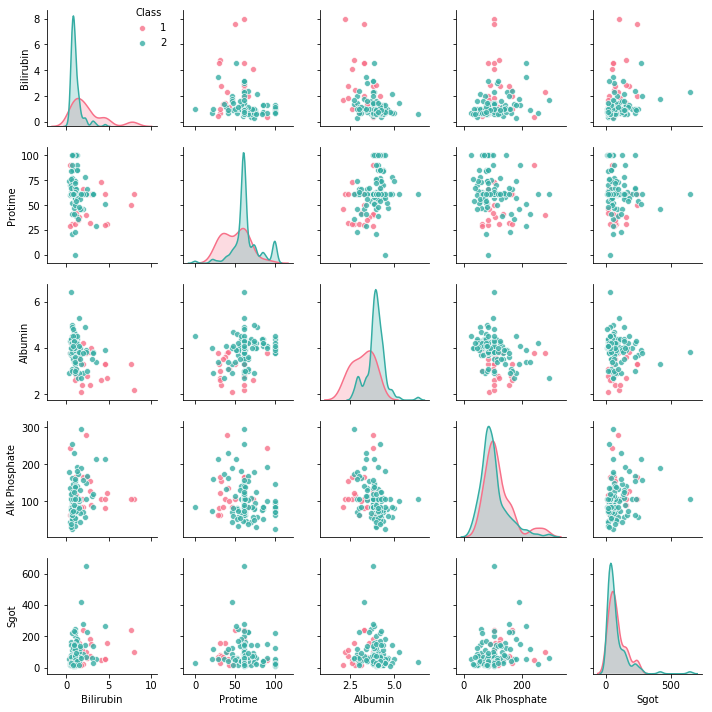

In [110]:
import seaborn as sns 
g = sns.pairplot(dataset, x_vars = ['Bilirubin', 'Protime', 'Albumin', 'Alk Phosphate', 'Sgot'], 
               y_vars = ['Bilirubin', 'Protime', 'Albumin', 'Alk Phosphate', 'Sgot'], 
               hue = 'Class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

Dari plot, dapat diketahui beberapa hal:

- Dapat diamati bahwa dalam beberapa variabel, pasien cenderung berdiferensiasi berdasarkan apakah mereka termasuk dalam Kelas 1 atau Kelas 2. Namun perbedaan ini tidak sepenuhnya jelas.

In [111]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30), solver = 'adam', tol = -1)
mlp.fit(X_train, y_train)

C:\Users\User\AppData\Local\conda\conda\envs\tensorflow-session\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=-1,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [112]:
#predicting test data
predictions = mlp.predict(X_test)

- Confusion Matrix

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [113]:
y_test_number = np.argmax(y_test, axis = 1)
y_test_precit = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_number, y_test_precit))

[[19  5]
 [10  9]]


In [114]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

43/43 [==============================] - 0s 140us/step

acc: 78.29%


In [120]:
precission =((19) / (19+10))
print("\n%s: %.2f%%" % ("precission", precission*100))


precission: 65.52%


In [121]:
recall = ((19) / (19+5))
print("\n%s: %.2f%%" % ("Recall", recall*100))


Recall: 79.17%


In [122]:
accuracy = ((19+9) / (19+9+10+5))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))


Accuracy: 65.12%


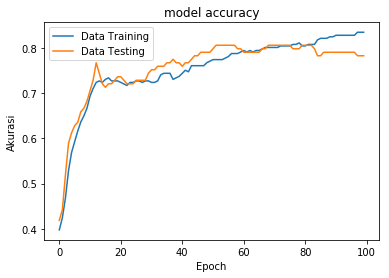

In [123]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

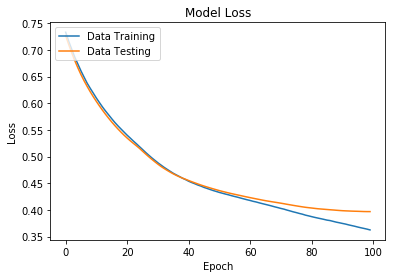

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

Model dasar sekarang telah dilatih dan telah mempelajari hubungan antara variabel independen dan variabel target. Sekarang, dapat memeriksa seberapa baik model dengan membuat prediksi pada set tes. Kemudian dapat membandingkan prediksi dengan label yang dikenal. Akan kembali menghitung nilai-nilai yang hilang dalam set pengujian dan menggunakan fungsi prediksi dan metrik akurasi_kelas untuk mengevaluasi kinerja model.

# Kesimpulan

Dengan demikian dapat diketahui pada dataset Hepatitis yang terdiri dari 2 kelas (Group) yaitu (Group=1) untuk pasien yang hidup dan (Group=2) untuk pasien yang mati dengan jumlah variabel prediktor sebanyak 19 variabel yang terdiri dari variabel numerik dan kategorik. Berdasarkan dari perhitungan nilai akurasi dari klasifikasi menurut metode yang telah digunakan diperoleh nilai akurasi  dalam memprediksi status penyakit pasien hepatitis tersebut adalah sebesar 65,12%. Nilai akurasi tersebut menjelaskan bahwa peluang dalam memprediksi status pasien penyakit hepatitis dengan tepat yaitu sekitar 65,12% dari 100% keseluruhan data.
